In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
## Import Data
sensor_data = pd.read_csv('./data/october_RAW.csv', parse_dates = ['Local Date/Time', 'UTC Date/Time'])
cal_data = pd.read_csv('./data/lab_reference-CO2.csv', parse_dates = ['datetime_utc'])

In [ ]:
## Choose relevant columns
sens_c = sensor_data[['Local Date/Time', 'CO2 (ppm) raw']]
cal_c = cal_data[['datetime_utc', 'ref_co2_ppm']]

In [29]:
## Choose correct time frame for sensor data (oct 9-12?)
sens_c = sens_c.loc[(
        sens_c['Local Date/Time'] >= pd.Timestamp(2025, 10, 9)
    ) & (
        sens_c['Local Date/Time'] <= pd.Timestamp(2025, 10, 13)
    ) & (
        sens_c['CO2 (ppm) raw'] <= 320
    )
]

In [32]:
## Find maximum and minimum values for each
display(sens_c.nlargest(n = 10, columns = 'CO2 (ppm) raw'))
display(cal_c.nlargest(n = 10, columns = 'ref_co2_ppm'))

,Local Date/Time,CO2 (ppm) raw
16237,2025-10-12 08:35:14,300.00
16238,2025-10-12 08:34:13,300.00
16239,2025-10-12 08:33:12,300.00
16240,2025-10-12 08:32:11,300.00
16241,2025-10-12 08:31:09,300.00
16242,2025-10-12 08:30:07,300.00
16243,2025-10-12 08:29:06,300.00
16244,2025-10-12 08:28:05,300.00
16245,2025-10-12 08:27:03,299.67
16371,2025-10-12 06:17:53,299.33


,datetime_utc,ref_co2_ppm
941,2025-10-12 06:25:00,492.66
942,2025-10-12 06:30:00,492.51
889,2025-10-12 02:05:00,491.45
890,2025-10-12 02:10:00,491.37
915,2025-10-12 04:15:00,491.36
914,2025-10-12 04:10:00,491.28
916,2025-10-12 04:20:00,491.26
913,2025-10-12 04:05:00,491.14
917,2025-10-12 04:25:00,490.97
912,2025-10-12 04:00:00,490.89


From the eyeball test, we see that the sensor data has a maximum somewhere around 8:30 on Oct 12th. The calibration data seems to show an absolute maximum aronud 6:30 on the same day, although it also has near (and large) values around 2:00 and 4:00.

From this, we can deduce that we need to shift the data backwards by around 120 minutes for our sensor.

In [34]:
TIME_SHIFT = - pd.Timedelta(hours = 2)

sens_c['Local Date/Time'] = sens_c['Local Date/Time'] + TIME_SHIFT

<Axes: xlabel='datetime_utc'>

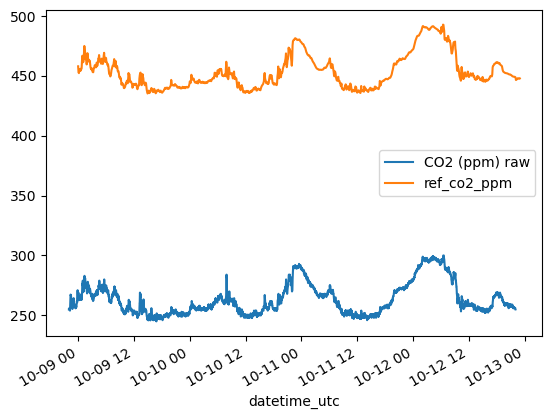

In [ ]:
## Plot data
fig, ax = plt.subplots()

sens_c.plot(x = 'Local Date/Time', y = 'CO2 (ppm) raw', ax = ax)
cal_c.plot(x = 'datetime_utc', y = 'ref_co2_ppm', ax = ax)

In [39]:
## Regularising the time series
sens_c.reindex(cal_c['datetime_utc'])

,Local Date/Time,CO2 (ppm) raw
datetime_utc,,
2025-10-09 00:00:00,NaT,NaN
2025-10-09 00:05:00,NaT,NaN
2025-10-09 00:10:00,NaT,NaN
2025-10-09 00:15:00,NaT,NaN
2025-10-09 00:20:00,NaT,NaN
...,...,...
2025-10-12 22:35:00,NaT,NaN
2025-10-12 22:40:00,NaT,NaN
2025-10-12 22:45:00,NaT,NaN


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit()

TypeError: LinearRegression.fit() missing 2 required positional arguments: 'X' and 'y'